In [1]:
import numpy as np
import pandas as pd
import string
import re 
from patsy import dmatrices

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss #evaluation metric

from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from datetime import datetime
from matplotlib.colors import LogNorm
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA

%matplotlib inline

/Users/theophilus/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%ls *.csv

features.csv          submit.csv            test.csv
features2.csv         submit_NB.csv         train.csv
results.csv           submit_test.csv
sanCrimeFeatures.csv  submit_test_NB.csv


In [3]:
#reading the proccessed data set
SNF = pd.read_csv("sanCrimeFeatures.csv" , sep=',')

# printing size of data frame
print ('Size of data frame: ',SNF.shape)

Size of data frame:  (878049, 106)


In [32]:
SNF.head()

,Unnamed: 0,X,Y,Summer,Fall,Winter,Spring,Addr,PD_BAYVIEW,PD_CENTRAL,...,YEAR_2007,YEAR_2008,YEAR_2009,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,crime
0,0,-0.107902,0.007832,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,37
1,1,-0.107902,0.007832,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,21
2,2,-0.057541,0.064335,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,21
3,3,-0.144262,0.065338,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16
4,4,-0.531112,0.001140,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16


In [4]:
#drop Unnamed column.
SNF_df = SNF.drop('Unnamed: 0',axis=1)
SNF_df.head()

,X,Y,Summer,Fall,Winter,Spring,Addr,PD_BAYVIEW,PD_CENTRAL,PD_INGLESIDE,...,YEAR_2007,YEAR_2008,YEAR_2009,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,crime
0,-0.107902,0.007832,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,37
1,-0.107902,0.007832,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,21
2,-0.057541,0.064335,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,21
3,-0.144262,0.065338,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16
4,-0.531112,0.001140,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16


In [5]:
SNF_df.shape

(878049, 105)

In [6]:
#print features column names
collist=SNF_df.columns.tolist()

In [7]:
# features
X = SNF_df[collist[:-1]]

In [10]:
# targets
y = SNF_df['crime']
y.shape

(878049,)

In [11]:
X.head()

,X,Y,Summer,Fall,Winter,Spring,Addr,PD_BAYVIEW,PD_CENTRAL,PD_INGLESIDE,...,YEAR_2006,YEAR_2007,YEAR_2008,YEAR_2009,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015
0,-0.107902,0.007832,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.107902,0.007832,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.057541,0.064335,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.144262,0.065338,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.531112,0.001140,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
n_samples,n_features = X.shape
[n_samples,n_features]

[878049, 104]

## Locally Linear Embedding applied to : ['standard', 'ltsa', 'modified']

In [28]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

standard: 0.86 sec
ltsa: 3.4 sec
modified: 3.9 sec


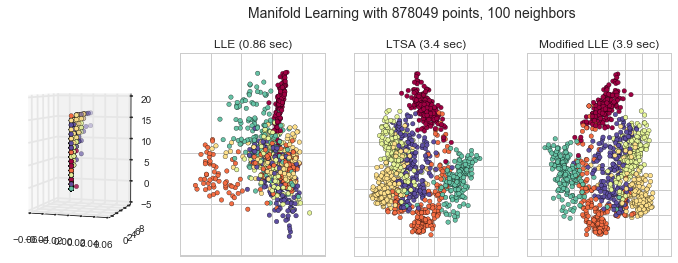

In [48]:
n_points = 878049
n_neighbors = 100
n_components = 10

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"% (n_points, n_neighbors), fontsize=14)
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Spectral)


methods = ['standard', 'ltsa', 'modified']
labels = ['LLE', 'LTSA', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, reg=0.001, \
                                        eigen_solver='auto', tol=1e-06, max_iter=100, \
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

## Hessian LLE
Note : neigbors > n_components *(n_components+3)/2

hessian: 3.4 sec


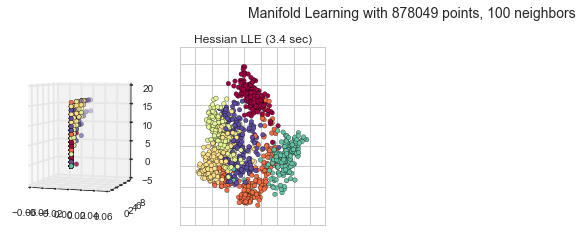

In [47]:
n_points = 878049
n_neighbors = 100
n_components = 10

fig = plt.figure(figsize=(15, 7))
plt.suptitle("Manifold Learning with %i points, %i neighbors"% (n_points, n_neighbors), fontsize=14)
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Spectral)


methods = ['hessian']
labels = ['Hessian LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, reg=0.001, \
                                        eigen_solver='auto', tol=1e-06, max_iter=100, \
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

## MDS:

MDS: 3.7 sec


(-26.776933455397405,
 27.958446257783457,
 -34.278245003303304,
 34.406478468721225)

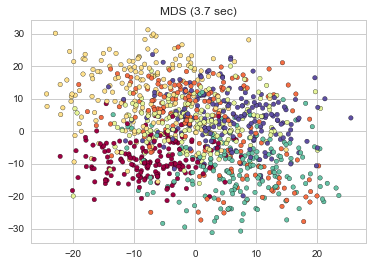

In [51]:
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## Spectral Embedding:

SpectralEmbedding: 0.62 sec


(-0.43916296071470701,
 1.0063312321482085,
 -0.47723779554680773,
 0.95111940863782962)

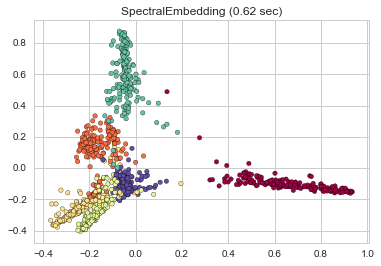

In [49]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## Isomap

Isomap: 2.6 sec


(-64.388269817740408,
 74.665277838535459,
 -60.413820969525965,
 63.304579407472659)

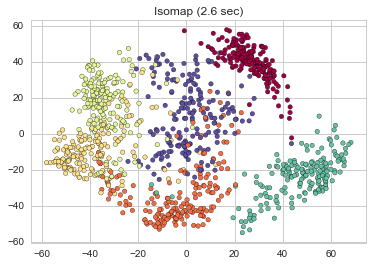

In [50]:
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## t-Distributed Stochastic Neighbor Embedding (t-SNE) 
is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. 

t-SNE: 5.9 sec


(-34.620387420420947,
 40.956074886727315,
 -49.946344229346451,
 37.169255243215275)

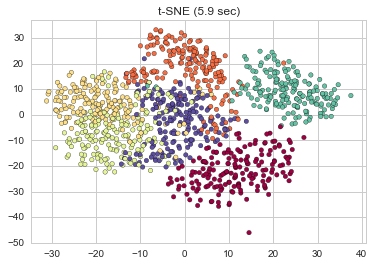

In [32]:
#plt.figure(figsize=(15,10))
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')